In [1]:
pip install stable-baselines3 gym numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.3 MB/s eta 0:00:00


In [5]:
pip install shimmy

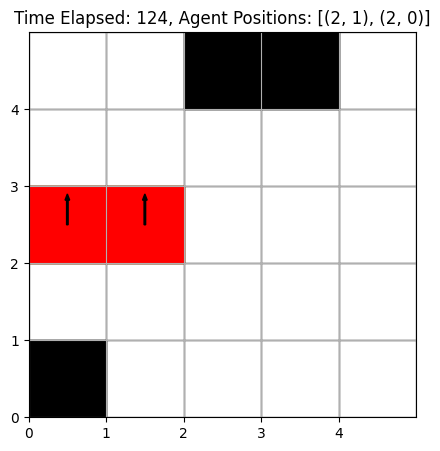

All agents reached their goals!


In [88]:
from stable_baselines3 import PPO

# Initialize the multi-agent environment with 2 agents and 3 obstacles
env = MultiAgentWarehouseEnv(rows=5, cols=5, num_agents=2, num_obstacles=5)

# Initialize PPO model for multi-agent environment
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)
model.save("PPO MLP")
# Test the trained model
obs = env.reset()
for i in range(200):
    action, _states = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    env.render()
    if done:
        print("All agents reached their goals!")
        break

env.close()


In [91]:
import matplotlib.pyplot as plt
import time

# Function to test both agents and collect the necessary data
def test_agents(env, model, max_steps=100):
    obs = env.reset()
    total_rewards = [0] * env.num_agents  # Track total rewards for each agent
    steps = [0] * env.num_agents  # Track the number of steps each agent takes
    rewards_per_step = [[] for _ in range(env.num_agents)]  # Track rewards at each step
    positions = [[] for _ in range(env.num_agents)]  # Track positions of each agent
    done_list = [False] * env.num_agents  # Track whether each agent has finished

    # Start time measurement
    start_time = time.time()

    for step in range(max_steps):
        actions, _states = model.predict(obs)  # Get actions for both agents
        obs, rewards, done_list, _ = env.step(actions)

        # Track data for each agent
        for i in range(env.num_agents):
            if not done_list[i]:  # Only track if the agent is still moving
                positions[i].append(env.agents_pos[i])  # Track position
                rewards_per_step[i].append(rewards)  # Track reward at each step
                total_rewards[i] += rewards  # Accumulate reward
                steps[i] += 1  # Increment step count

        env.render()  # Render the environment during testing

        # If all agents are done, break the loop
        if all(done_list):
            print("All agents reached their goals!")
            break

    # End time measurement
    end_time = time.time()

    # Calculate total time taken for both agents to finish
    total_time = end_time - start_time

    return total_rewards, steps, positions, rewards_per_step, total_time

# Function to visualize the results for both agents
def visualize_agents_results(total_rewards, steps, positions, rewards_per_step, total_time):
    num_agents = len(total_rewards)

    # Set up subplots for visualization
    fig, axs = plt.subplots(4, num_agents, figsize=(6 * num_agents, 16))

    for i in range(num_agents):
        # 1. Rewards per step
        axs[0, i].plot(rewards_per_step[i], marker='o', color='blue')
        axs[0, i].set_title(f'Agent {i+1} - Rewards per Step')
        axs[0, i].set_xlabel('Step')
        axs[0, i].set_ylabel('Reward')
        axs[0, i].grid(True)

        # 2. Total rewards (accumulated rewards)
        axs[1, i].bar([f'Agent {i+1}'], [total_rewards[i]], color='green')
        axs[1, i].set_title(f'Agent {i+1} - Total Rewards')
        axs[1, i].set_ylabel('Total Reward')
        axs[1, i].grid(True)

        # 3. Total steps taken by each agent
        axs[2, i].bar([f'Agent {i+1}'], [steps[i]], color='orange')
        axs[2, i].set_title(f'Agent {i+1} - Total Steps Taken')
        axs[2, i].set_ylabel('Steps')
        axs[2, i].grid(True)

        # 4. Path of the agent
        x_positions = [pos[1] for pos in positions[i]]  # Extract X coordinates
        y_positions = [pos[0] for pos in positions[i]]  # Extract Y coordinates
        axs[3, i].plot(x_positions, y_positions, marker='o', color='red')
        axs[3, i].set_title(f'Agent {i+1} - Path Taken')
        axs[3, i].set_xlabel('X Position')
        axs[3, i].set_ylabel('Y Position')
        axs[3, i].grid(True)

    # Display total time taken for both agents to finish
    fig.suptitle(f"Total Time Taken: {total_time:.2f} seconds", fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Initialize the environment and load the trained model
env = MultiAgentWarehouseEnv(rows=5, cols=5, num_agents=2, num_obstacles=3)

# Test the agents and collect the necessary data
total_rewards, steps, positions, rewards_per_step, total_time = test_agents(env, model)

# Visualize the results for both agents
visualize_agents_results(total_rewards, steps, positions, rewards_per_step, total_time)


TypeError: 'bool' object is not subscriptable